In [56]:
from matplotlib import pyplot as plt
import numpy as np
import imutils
import cv2
import numpy

In [62]:
import pytesseract
from PIL import Image
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\rushi.bagul\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"  # For Windows

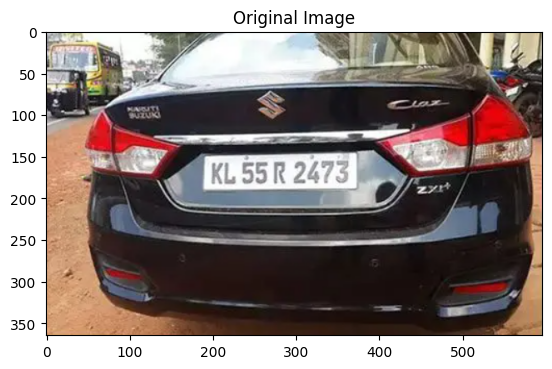

Text(0.5, 1.0, 'Processed Image')

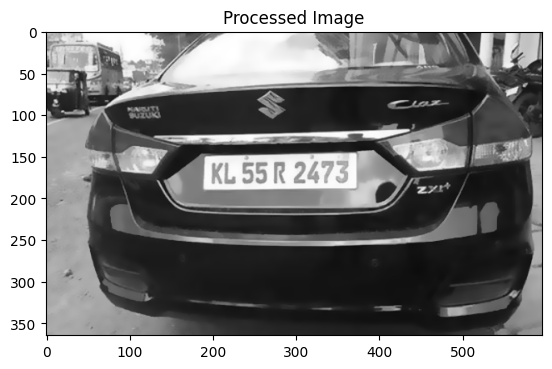

In [114]:
img = cv2.imread(r"data\car5.png") #read image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert image to gray
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB)) #show processed image
plt.title('Processed Image')

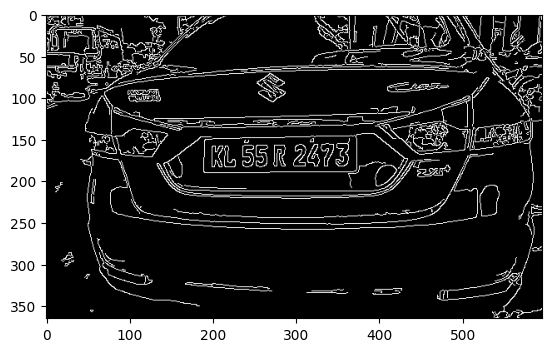

In [115]:
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [116]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #Find contours 
contours = imutils.grab_contours(keypoints) #Grab contours 
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] #Sort contours

#Loop over our contours to find the best possible approximate contour of 10 contours
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
     
print("Location: ", location)

Location:  [[[373 149]]

 [[369 189]]

 [[189 188]]

 [[192 150]]]


In [121]:
if location:
    mask = np.zeros(gray.shape, np.uint8) #create blank image with same dimensions as the original image
    new_image = cv2.drawContours(mask, [location], 0,255, -1) #Draw contours on the mask image
    new_image = cv2.bitwise_and(img, img, mask=mask) #Take bitwise AND between the original image and mask image

    plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)) #show the final image
else:
    print("Number plate not detected !")
    print("Below Code will not work !!!")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [119]:
(x,y) = np.where(mask==255) #Find the co-ordinates of the four corners of the document
(x1, y1) = (np.min(x), np.min(y)) #Find the top left corner
(x2, y2) = (np.max(x), np.max(y)) #Find the bottom right corner
cropped_image = gray[x1:x2+1, y1:y2+1] #Crop the image using the co-ordinates

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)) #show the cropped image

ValueError: zero-size array to reduction operation minimum which has no identity

In [120]:
text = pytesseract.image_to_string(cropped_image)
text = text[:-2]
text


''

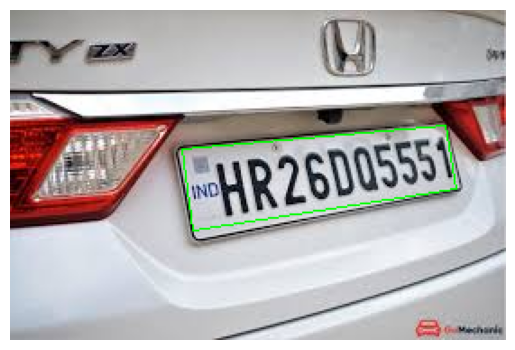

In [92]:
import cv2
import matplotlib.pyplot as plt

# Assuming 'img' is your original image and 'location' is the polygon for the bounding box
size = 1
# Create a copy of the original image to draw on
img_original = img.copy()

# Draw the polygon (rectangle around the number plate)
cv2.polylines(img_original, [location], isClosed=True, color=(0, 255, 0), thickness=size)

# The text you want to add above the bounding box
# Get the coordinates of the bounding box
x, y, w, h = cv2.boundingRect(location)  # This will give you the top-left (x, y) and width (w), height (h)

# Define the position of the text: above the top of the bounding box
text_x = x
text_y = y - 10  # 10 pixels above the top of the box

# Font and thickness settings
font = cv2.FONT_HERSHEY_SIMPLEX
font_color = (0, 0, 255)  # Red color for text
font_thickness = size

# Calculate font scale based on bounding box width (w)
max_font_scale = w / 200  # Adjust divisor as needed (200 is arbitrary; it ensures the font isn't too large)
if max_font_scale < 0.5:
    max_font_scale = 0.5  # Ensure that text doesn't become too small
if max_font_scale > 1.5:
    max_font_scale = 1.5  # Limit the maximum font size

# Measure text size with a test font scale to ensure it fits within the box
text_size = cv2.getTextSize(text, font, max_font_scale, font_thickness)[0]
text_width, text_height = text_size

# Adjust the font scale if the text width is greater than the bounding box width
while text_width > w and max_font_scale > 0.1:
    max_font_scale -= 0.1  # Gradually decrease the font scale
    text_size = cv2.getTextSize(text, font, max_font_scale, font_thickness)[0]
    text_width, text_height = text_size

# Now draw the text on the image
cv2.putText(img_original, text, (text_x, text_y), font, max_font_scale, font_color, font_thickness)

# Convert to RGB for plotting with Matplotlib
plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis for a clean plot
plt.show()
